In [129]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

import matplotlib.pyplot as plt

import numpy as np

import random

from typing import Optional

In [130]:
tf.__version__

'2.16.1'

In [131]:
keras.__version__

'3.3.3'

1. Load data

In [132]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [133]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

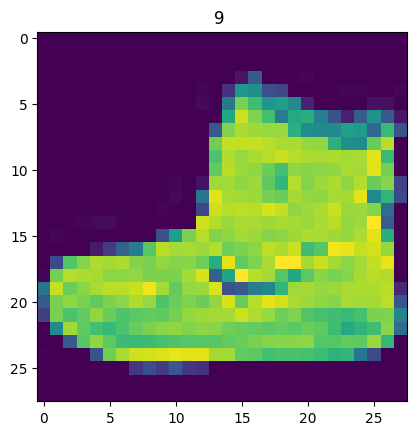

In [134]:
plt.title(f"{y_train[0]} ")
plt.imshow(X_train[0])

In [135]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

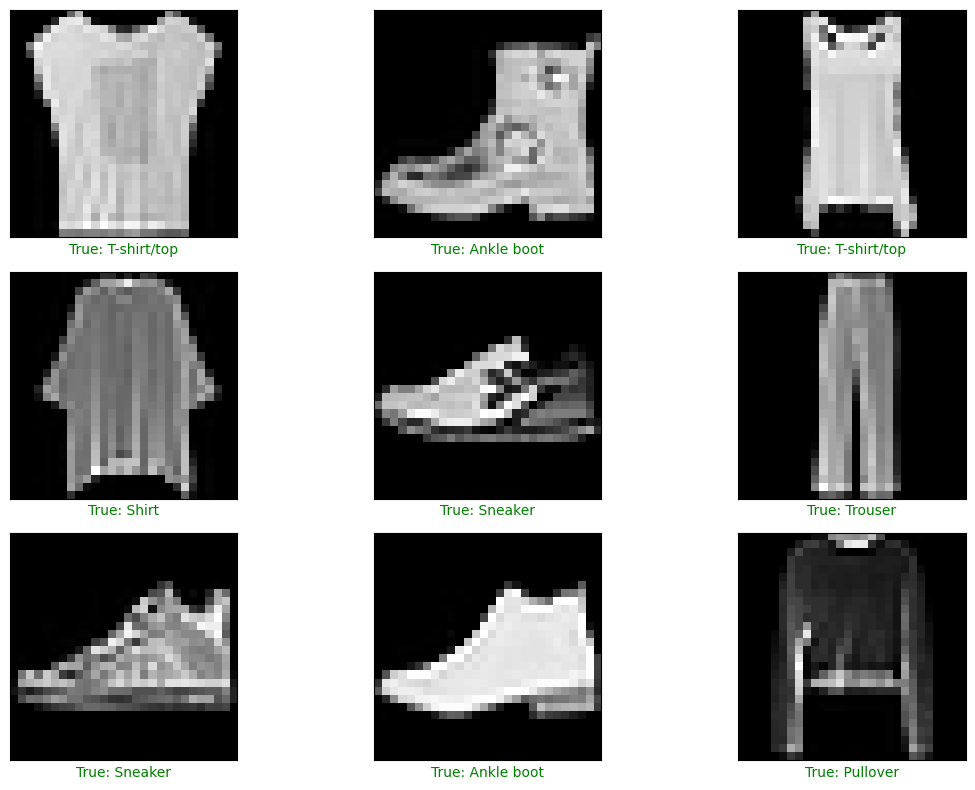

In [136]:
def plot_image(x_data: np.ndarray, y_data: np.ndarray, y_prob: Optional[np.ndarray] = None) -> None:
  rows, cols = 3,3
  fig, axes = plt.subplots(rows,cols,figsize = (12,8))
  x_len = x_data.shape[0]

  for i in range(rows*cols):
    ax = axes[i // rows, i % cols]

    img_idx = random.randint(0,x_len)

    ax.imshow(x_data[img_idx], cmap = 'gray')
    ax.set(xticks=[],yticks=[])

    color = 'green'
    true_label = f"True: {class_names[y_data[img_idx]]}"

    if y_prob is not None:
      predicted_idx = np.argmax(y_prob[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label if y_prob is None else true_label + predicted_label_str
    ax.set_xlabel(img_title, color = color)

  plt.tight_layout()
  plt.show()

plot_image(X_train, y_train)

2. Preprocess data

In [137]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [138]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [139]:
y_train_label = keras.utils.to_categorical(y_train, len(class_names))
y_test_label = keras.utils.to_categorical(y_test, len(class_names))

In [140]:
y_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

3. ANN

In [141]:
# model = keras.models.Sequential([
#     layers.Input(shape=(28, 28, 1)),
#     layers.Flatten(), # nếu input là nhiều dims thì cần chuyển sang 1D array
#     # layers.Dense(512,activation='relu'), #activation function dùng để tránh linear mapping
#     layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     layers.Dropout(0.5),  # 50% Dropout rate
#     # layers.Dense(256,activation='relu'),
#     layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     layers.Dropout(0.5),  # 50% Dropout rate
#     # layers.Dense(128,activation='relu'),
#     layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     layers.Dropout(0.5),  # 50% Dropout rate
#     layers.Dense(10,activation='softmax') # output layer
# ])

## 3.1 CNN
- Convolutional layers có khả năng học các đặc trưng không gian của hình ảnh (ví dụ, đường nét, hình dạng, mẫu) nhờ vào việc di chuyển các filter trên ảnh 2D. Nếu bạn Flatten hình ảnh từ đầu, bạn sẽ mất toàn bộ cấu trúc không gian của ảnh và chỉ còn lại một vector 1D. Điều này khiến mô hình không thể tận dụng được thông tin về không gian (ví dụ, các pixel gần nhau trong ảnh có mối quan hệ với nhau).
- Bằng cách sử dụng các lớp Conv2D trước khi Flatten, bạn giữ lại thông tin không gian để học các đặc trưng mạnh mẽ từ hình ảnh trước khi đưa vào các lớp Dense.

In [142]:
model = keras.models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Thêm Dropout với tỉ lệ 50%
    layers.Dense(10, activation='softmax')
])


In [143]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # dùng khi label là [0,1,0,0], sparse_categorical_crossentropy dùng khi label là [0,1,2,3,4,5,6]
    metrics=['accuracy']
)


Sử dụng kỹ thuật **Early Stopping** để ngăn mô hình overfitting, dừng huấn luyện khi mô hình không còn cải thiện trên tập validation.

In [144]:
epochs = 30
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train,y_train_label,
          epochs=epochs,
          batch_size=128,
          validation_split = 0.1)
#           callbacks=[early_stopping])

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5828 - loss: 1.1497 - val_accuracy: 0.8240 - val_loss: 0.4742
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8000 - loss: 0.5554 - val_accuracy: 0.8612 - val_loss: 0.3876
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.4568 - val_accuracy: 0.8758 - val_loss: 0.3362
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8611 - loss: 0.3982 - val_accuracy: 0.8733 - val_loss: 0.3425
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.3675 - val_accuracy: 0.8855 - val_loss: 0.3054
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.3445 - val_accuracy: 0.8902 - val_loss: 0.2960
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.3238 - val_accuracy: 0.8945 - val_loss: 0.2887
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3021 - val_accuracy: 0.

In [145]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [146]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

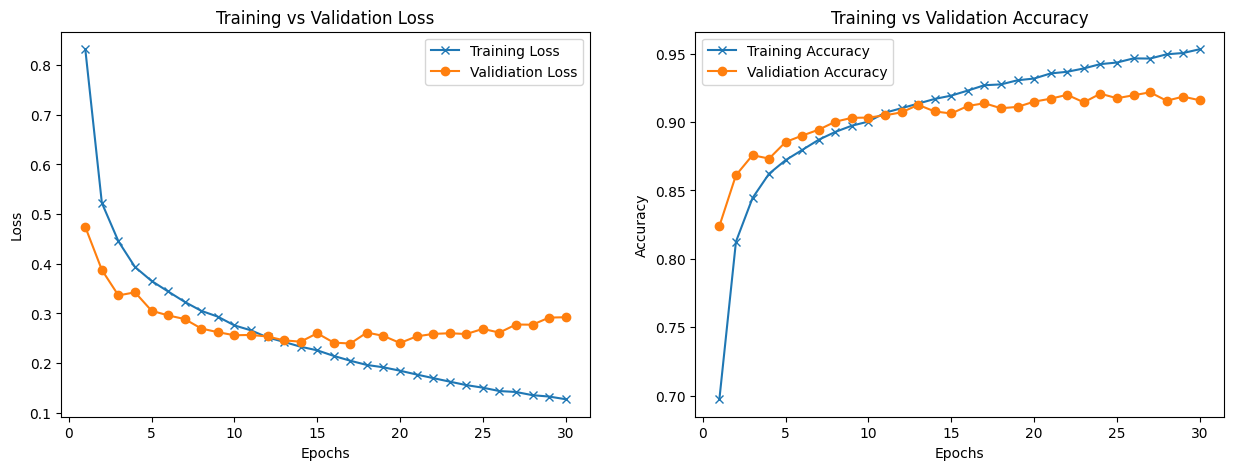

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs,train_loss, label = 'Training Loss', marker = 'x')
ax1.plot(epoch_runs,val_loss, label = 'Validiation Loss', marker = 'o')
ax1.set(title = 'Training vs Validation Loss', xlabel = 'Epochs',ylabel = 'Loss')
ax1.legend()

ax2.plot(epoch_runs,train_acc, label = 'Training Accuracy', marker = 'x')
ax2.plot(epoch_runs,val_acc, label = 'Validiation Accuracy', marker = 'o')
ax2.set(title = 'Training vs Validation Accuracy', xlabel = 'Epochs',ylabel = 'Accuracy')
ax2.legend()

plt.show()

4. Model evaluation

In [149]:
score = model.evaluate(X_test,y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9050 - loss: 0.3303


In [150]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.3112
Test Accuracy: 0.9113


In [151]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


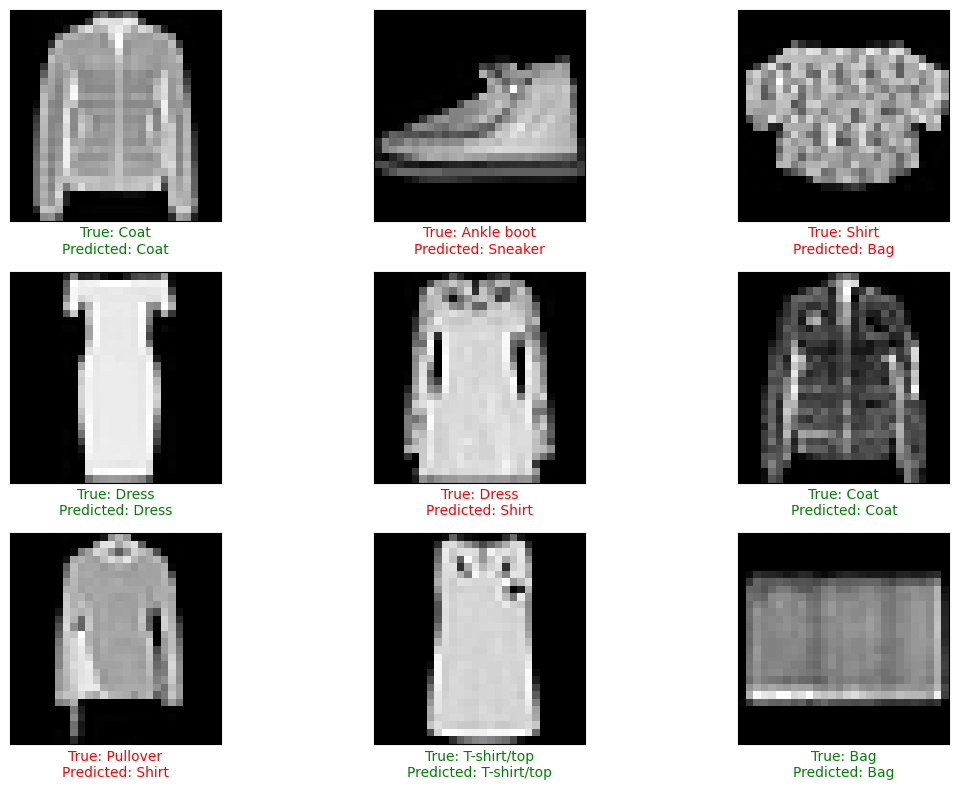

In [153]:
plot_image(X_test, y_test, y_prob)